In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import netCDF4
from datetime import datetime as dt
import seaborn as sns
import time
import cartopy.crs as ccrs
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
chlor = xr.open_dataset('../input/cholorophyll-a-copernicus-kasatochi/chl-a.nc')
df = chlor.to_dataframe()

In [5]:
df.loc[:,["date", "lat", "lon"]] = df.index.values.tolist()
df.index = range(len(df))

In [6]:
df.head()

,PICO,PROKAR,HAPTO_uncertainty,PICO_uncertainty,CHL,DINO,HAPTO,flags,GREEN_uncertainty,GREEN,...,MICRO_uncertainty,DIATO,DIATO_uncertainty,PROCHLO_uncertainty,NANO_uncertainty,MICRO,PROKAR_uncertainty,date,lat,lon
0,NaN,NaN,NaN,NaN,0.531391,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,52.354164,-175.770828
1,NaN,NaN,NaN,NaN,0.569299,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,52.354164,-175.729172
2,NaN,NaN,NaN,NaN,0.548757,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,52.354164,-175.687500
3,NaN,NaN,NaN,NaN,0.538497,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,52.354164,-175.645828
4,NaN,NaN,NaN,NaN,0.526892,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,52.354164,-175.604172


In [7]:
df.describe()

,PICO,PROKAR,HAPTO_uncertainty,PICO_uncertainty,CHL,DINO,HAPTO,flags,GREEN_uncertainty,GREEN,...,DINO_uncertainty,MICRO_uncertainty,DIATO,DIATO_uncertainty,PROCHLO_uncertainty,NANO_uncertainty,MICRO,PROKAR_uncertainty,lat,lon
count,6871.000000,6871.000000,6871.000000,6871.000000,98338.000000,6871.000000,6871.000000,384696.0,6871.000000,6871.000000,...,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,384696.000000,384696.000000
mean,0.132398,0.046453,327.669983,327.669983,0.466570,0.104797,0.280972,0.0,327.669983,0.085944,...,327.669983,327.669983,0.722162,327.669983,316.791260,327.669983,0.826959,327.669983,52.187499,-175.520833
std,0.092155,0.027611,0.000000,0.000000,0.472121,0.130970,0.162442,0.0,0.000000,0.081144,...,0.000000,0.000000,2.408408,0.000000,23.461164,0.000000,2.501283,0.000000,0.107583,0.155903
min,0.020216,0.005000,327.669983,327.669983,0.068993,0.013712,0.033622,0.0,327.669983,0.006124,...,327.669983,327.669983,0.033767,327.669983,204.789993,327.669983,0.067447,327.669983,52.020832,-175.770828
25%,0.077619,0.027956,327.669983,327.669983,0.236058,0.037892,0.152563,0.0,327.669983,0.047132,...,327.669983,327.669983,0.136584,327.669983,327.669983,327.669983,0.175811,327.669983,52.104164,-175.645828
50%,0.114916,0.040920,327.669983,327.669983,0.326392,0.062444,0.245210,0.0,327.669983,0.066156,...,327.669983,327.669983,0.224212,327.669983,327.669983,327.669983,0.289732,327.669983,52.187500,-175.520828
75%,0.164520,0.057374,327.669983,327.669983,0.509139,0.114007,0.371183,0.0,327.669983,0.105480,...,327.669983,327.669983,0.444835,327.669983,327.669983,327.669983,0.558098,327.669983,52.270832,-175.395828
max,3.637341,0.361482,327.669983,327.669983,18.046711,1.498236,1.916163,0.0,327.669983,3.414212,...,327.669983,327.669983,40.123516,327.669983,327.669983,327.669983,40.825520,327.669983,52.354164,-175.270828


In [8]:
df.isnull().sum()

PICO                   377825
PROKAR                 377825
HAPTO_uncertainty      377825
PICO_uncertainty       377825
CHL                    286358
DINO                   377825
HAPTO                  377825
flags                       0
GREEN_uncertainty      377825
GREEN                  377825
PROCHLO                377825
NANO                   377825
CHL_uncertainty        286358
DINO_uncertainty       377825
MICRO_uncertainty      377825
DIATO                  377825
DIATO_uncertainty      377825
PROCHLO_uncertainty    377825
NANO_uncertainty       377825
MICRO                  377825
PROKAR_uncertainty     377825
date                        0
lat                         0
lon                         0
dtype: int64

In [9]:
len(df) - df.DIATO.isnull().sum()

6871

In [10]:
df.dropna(inplace=True)
df

,PICO,PROKAR,HAPTO_uncertainty,PICO_uncertainty,CHL,DINO,HAPTO,flags,GREEN_uncertainty,GREEN,...,MICRO_uncertainty,DIATO,DIATO_uncertainty,PROCHLO_uncertainty,NANO_uncertainty,MICRO,PROKAR_uncertainty,date,lat,lon
6084,0.062971,0.020702,327.669983,327.669983,0.416151,0.056931,0.236307,0,327.669983,0.042269,...,327.669983,0.247965,327.669983,327.669983,327.669983,0.304896,327.669983,2004-02-22,52.354164,-175.770828
6085,0.066174,0.022268,327.669983,327.669983,0.440341,0.062054,0.241895,0,327.669983,0.043906,...,327.669983,0.267497,327.669983,327.669983,327.669983,0.329550,327.669983,2004-02-22,52.354164,-175.729172
6086,0.071400,0.018580,327.669983,327.669983,0.433033,0.057666,0.275546,0,327.669983,0.052821,...,327.669983,0.285470,327.669983,327.669983,327.669983,0.343136,327.669983,2004-02-22,52.354164,-175.687500
6087,0.072258,0.017749,327.669983,327.669983,0.435477,0.056660,0.280064,0,327.669983,0.054509,...,327.669983,0.292953,327.669983,327.669983,327.669983,0.349613,327.669983,2004-02-22,52.354164,-175.645828
6088,0.069567,0.016708,327.669983,327.669983,0.419336,0.056827,0.276918,0,327.669983,0.052859,...,327.669983,0.310594,327.669983,327.669983,327.669983,0.367421,327.669983,2004-02-22,52.354164,-175.604172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377248,0.116165,0.072285,327.669983,327.669983,0.314139,0.026954,0.072684,0,327.669983,0.043880,...,327.669983,0.081057,327.669983,327.669983,327.669983,0.108011,327.669983,2012-10-29,52.229164,-175.729172
377249,0.161257,0.106234,327.669983,327.669983,0.307373,0.029196,0.076002,0,327.669983,0.055023,...,327.669983,0.068682,327.669983,327.669983,327.669983,0.097879,327.669983,2012-10-29,52.229164,-175.687500
377250,0.172752,0.108787,327.669983,327.669983,0.317661,0.031492,0.081269,0,327.669983,0.063966,...,327.669983,0.068186,327.669983,327.669983,327.669983,0.099678,327.669983,2012-10-29,52.229164,-175.645828
377251,0.185959,0.111784,327.669983,327.669983,0.328784,0.033797,0.086341,0,327.669983,0.074174,...,327.669983,0.067402,327.669983,327.669983,327.669983,0.101199,327.669983,2012-10-29,52.229164,-175.604172


<Figure size 1440x864 with 0 Axes>

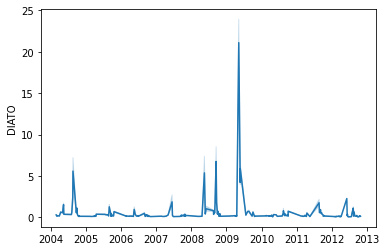

In [11]:
plt.figure(figsize=(20,12))
fig, ax = plt.subplots()
ax = sns.lineplot(df['date'].dt.to_pydatetime(), df['DIATO'].astype(float));

In [13]:
df.loc(0)[df['date']=='2008-08-18'].date

197849   2008-08-18
197850   2008-08-18
197851   2008-08-18
197852   2008-08-18
197853   2008-08-18
            ...    
197958   2008-08-18
197959   2008-08-18
197960   2008-08-18
197961   2008-08-18
197962   2008-08-18
Name: date, Length: 105, dtype: datetime64[ns]

(-175.7708282470703, -175.2708282470703)

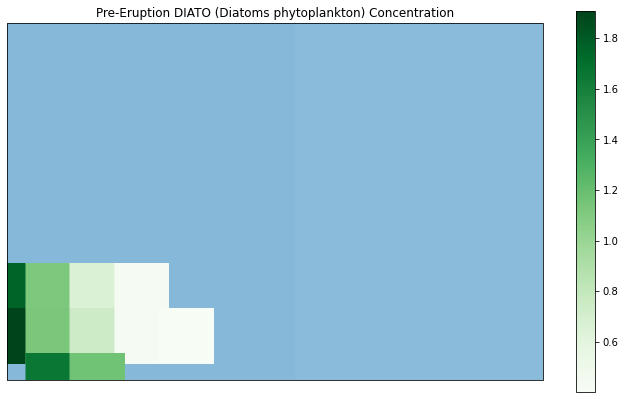

In [14]:
plt.rcParams['figure.figsize'] = (12,7)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines(resolution='110m')
rect = list(zip([-0.041656494140625,0.041656494140625,0.041656494140625,-0.041656494140625],[-0.041656494140625,-0.041656494140625,0.041656494140625,0.041656494140625]))
ax.set_extent([-175.2708,-175.7708,52.02083,52.35416])
plt.scatter(y='lat',x ='lon',
            data=df[df['date']=='2008-06-03'], 
            c='DIATO', 
            cmap='Greens',
            s=[54.6559**2]*len(df[df['date']=='2008-06-03']),
            marker=rect,
            transform=ccrs.PlateCarree()
           )
plt.colorbar()
ax.set_title("Pre-Eruption DIATO (Diatoms phytoplankton) Concentration")
ax.set_ylim(df['lat'].min(), df['lat'].max())
ax.set_xlim(df['lon'].min(), df['lon'].max())

In [15]:
def generate_heatmap(date):
    temp = df[df["date"] == date]
    temp.loc[:, "longitude"] = temp.loc[:, "longitude"].astype(float)
    temp.loc[:, "latitude"] = temp.loc[:, "latitude"].astype(float)
    temp.loc[:, "chlor_a"] = temp.loc[:, "chlor_a"].astype(float)
    verts = list(zip([-0.041656494140625, 0.041656494140625, 0.041656494140625, -0.041656494140625],[-0.041656494140625, -0.041656494140625, 0.041656494140625, 0.041656494140625]))

    ax = temp.plot.scatter(x = "longitude",
                           y = "latitude",
                           c = "chlor_a",
                           cmap="Greens",
                           marker = verts,
                           s = [69.456494140625**2]*len(df[df["date"] == '2008-08-18']),
                           colorbar = True
                          )
    ks.plot.scatter(x = "lon", y="lat", color="black", figsize=(7.8,10), ax = ax)
    plt.xlim([df.longitude.loc[1:].astype(float).min(), df.longitude.loc[1:].astype(float).max()])
    plt.ylim([df.latitude.loc[1:].astype(float).min(), df.latitude.loc[1:].astype(float).max()])
    plt.xlabel("lon")
    plt.title("heatmap")
    return plt.show()

In [16]:
island = [
[-175.4951763, 52.1758258],
[-175.4962063, 52.1771410],
[-175.4963779, 52.1778774],
[-175.4970646, 52.1788243],
[-175.4976654, 52.1796133],
[-175.4985237, 52.1802971],
[-175.4988027, 52.1806380],
[-175.4981089, 52.1807915],
[-175.4981232, 52.1809436],
[-175.4985309, 52.1809042],
[-175.4987025, 52.1807990],
[-175.4990458, 52.1808253],
[-175.4992175, 52.1810620],
[-175.4992604, 52.1812987],
[-175.4995823, 52.1814696],
[-175.5000544, 52.1816406],
[-175.5003762, 52.1817720],
[-175.5007410, 52.1819035],
[-175.5012345, 52.1819824],
[-175.5016851, 52.1820876],
[-175.5023074, 52.1822060],
[-175.5025649, 52.1823243],
[-175.5030155, 52.1822849],
[-175.5035090, 52.1824295],
[-175.5037665, 52.1826136],
[-175.5040669, 52.1826662],
[-175.5045390, 52.1826662],
[-175.5048609, 52.1825742],
[-175.5050755, 52.1826662],
[-175.5053544, 52.1826662],
[-175.5059123, 52.1825873],
[-175.5065060, 52.1828283],
[-175.5069137, 52.1831307],
[-175.5073857, 52.1832754],
[-175.5077076, 52.1834989],
[-175.5078363, 52.1838014],
[-175.5082226, 52.1837488],
[-175.5086303, 52.1839065],
[-175.5091882, 52.1837488],
[-175.5097246, 52.1836173],
[-175.5101538, 52.1837356],
[-175.5106258, 52.1839460],
[-175.5110121, 52.1841169],
[-175.5114412, 52.1842353],
[-175.5118060, 52.1843273],
[-175.5124283, 52.1843536],
[-175.5128574, 52.1843273],
[-175.5127645, 52.1846692],
[-175.5128717, 52.1849453],
[-175.5132580, 52.1850374],
[-175.5136228, 52.1849059],
[-175.5139232, 52.1850637],
[-175.5142450, 52.1852740],
[-175.5144811, 52.1853792],
[-175.5145884, 52.1855633],
[-175.5149531, 52.1854976],
[-175.5149531, 52.1853661],
[-175.5151677, 52.1852740],
[-175.5154037, 52.1852477],
[-175.5158544, 52.1852740],
[-175.5160689, 52.1854844],
[-175.5163908, 52.1854187],
[-175.5167341, 52.1854844],
[-175.5168200, 52.1856028],
[-175.5171204, 52.1854187],
[-175.5172491, 52.1853135],
[-175.5173349, 52.1850900],
[-175.5174637, 52.1849059],
[-175.5178499, 52.1848533],
[-175.5181932, 52.1849716],
[-175.5183434, 52.1850900],
[-175.5187726, 52.1850111],
[-175.5185795, 52.1848270],
[-175.5185580, 52.1846166],
[-175.5184293, 52.1843668],
[-175.5181932, 52.1841695],
[-175.5180430, 52.1839065],
[-175.5182362, 52.1836304],
[-175.5185795, 52.1834595],
[-175.5188370, 52.1831439],
[-175.5191803, 52.1830124],
[-175.5196095, 52.1828678],
[-175.5198026, 52.1826442],
[-175.5200815, 52.1825653],
[-175.5204248, 52.1825653],
[-175.5207253, 52.1824338],
[-175.5210471, 52.1822497],
[-175.5214119, 52.1820919],
[-175.5222487, 52.1819078],
[-175.5228066, 52.1817895],
[-175.5232787, 52.1819473],
[-175.5234289, 52.1822366],
[-175.5239868, 52.1824338],
[-175.5243731, 52.1824601],
[-175.5248880, 52.1824601],
[-175.5254459, 52.1824338],
[-175.5258679, 52.1819736],
[-175.5261469, 52.1817500],
[-175.5265331, 52.1816185],
[-175.5264473, 52.1812240],
[-175.5263186, 52.1807769],
[-175.5261469, 52.1805665],
[-175.5259109, 52.1804219],
[-175.5255246, 52.1804876],
[-175.5252671, 52.1801063],
[-175.5254173, 52.1797775],
[-175.5255461, 52.1795803],
[-175.5257607, 52.1793436],
[-175.5259538, 52.1788701],
[-175.5260825, 52.1787649],
[-175.5265760, 52.1785151],
[-175.5267692, 52.1786597],
[-175.5271125, 52.1787518],
[-175.5274343, 52.1786203],
[-175.5278420, 52.1785019],
[-175.5282068, 52.1783836],
[-175.5284214, 52.1785414],
[-175.5287862, 52.1785940],
[-175.5290866, 52.1786466],
[-175.5294728, 52.1787518],
[-175.5298162, 52.1785414],
[-175.5300522, 52.1782389],
[-175.5301809, 52.1779101],
[-175.5297804, 52.1776515],
[-175.5294156, 52.1774542],
[-175.5290508, 52.1772307],
[-175.5286217, 52.1771386],
[-175.5283856, 52.1771386],
[-175.5283213, 52.1765074],
[-175.5286217, 52.1757446],
[-175.5289006, 52.1751922],
[-175.5291367, 52.1748108],
[-175.5294585, 52.1744557],
[-175.5296731, 52.1740480],
[-175.5298662, 52.1737323],
[-175.5299163, 52.1729992],
[-175.5298305, 52.1723416],
[-175.5297661, 52.1719602],
[-175.5293870, 52.1713332],
[-175.5291939, 52.1708071],
[-175.5291080, 52.1702810],
[-175.5290008, 52.1697812],
[-175.5287862, 52.1694918],
[-175.5284786, 52.1689456],
[-175.5280709, 52.1683406],
[-175.5276418, 52.1675908],
[-175.5270410, 52.1668663],
[-175.5268049, 52.1662086],
[-175.5260968, 52.1651686],
[-175.5254960, 52.1644583],
[-175.5248523, 52.1639179],
[-175.5242085, 52.1633916],
[-175.5235219, 52.1628260],
[-175.5233073, 52.1626813],
[-175.5221701, 52.1622077],
[-175.5215693, 52.1619314],
[-175.5215049, 52.1618130],
[-175.5200243, 52.1612465],
[-175.5189514, 52.1606282],
[-175.5172992, 52.1600091],
[-175.5160975, 52.1591408],
[-175.5147243, 52.1583908],
[-175.5134368, 52.1575883],
[-175.5122352, 52.1568208],
[-175.5111623, 52.1563734],
[-175.5100679, 52.1559524],
[-175.5093598, 52.1557419],
[-175.5086303, 52.1556366],
[-175.5078578, 52.1555314],
[-175.5068278, 52.1554524],
[-175.5058837, 52.1554129],
[-175.5049825, 52.1554393],
[-175.5037379, 52.1554393],
[-175.5024290, 52.1555577],
[-175.5012918, 52.1556893],
[-175.5003476, 52.1559963],
[-175.4992747, 52.1563509],
[-175.4985237, 52.1567851],
[-175.4976439, 52.1570745],
[-175.4968500, 52.1575219],
[-175.4960275, 52.1580412],
[-175.4954338, 52.1582981],
[-175.4948115, 52.1586928],
[-175.4942107, 52.1592059],
[-175.4936957, 52.1597862],
[-175.4933524, 52.1601283],
[-175.4928160, 52.1602467],
[-175.4926658, 52.1606282],
[-175.4924726, 52.1608914],
[-175.4922581, 52.1610755],
[-175.4920864, 52.1613255],
[-175.4918289, 52.1615097],
[-175.4918933, 52.1616675],
[-175.4917002, 52.1618123],
[-175.4915714, 52.1621280],
[-175.4916358, 52.1627770],
[-175.4917645, 52.1631453],
[-175.4918718, 52.1634742],
[-175.4919577, 52.1638294],
[-175.4921722, 52.1640662],
[-175.4925871, 52.1652458],
[-175.4927802, 52.1657325],
[-175.4931450, 52.1662323],
[-175.4935527, 52.1670216],
[-175.4935741, 52.1672189],
[-175.4937029, 52.1676530],
[-175.4939604, 52.1681002],
[-175.4943037, 52.1690341],
[-175.4942608, 52.1693893],
[-175.4941750, 52.1695603],
[-175.4941320, 52.1699812],
[-175.4939604, 52.1702705],
[-175.4938745, 52.1706914],
[-175.4938316, 52.1710203],
[-175.4936600, 52.1714149],
[-175.4934239, 52.1715201],
[-175.4927802, 52.1717042],
[-175.4924583, 52.1719147],
[-175.4926729, 52.1720988],
[-175.4924583, 52.1723618],
[-175.4921150, 52.1722961],
[-175.4918146, 52.1723618],
[-175.4919577, 52.1728090],
[-175.4921293, 52.1731510],
[-175.4921508, 52.1734140],
[-175.4924941, 52.1734140],
[-175.4929233, 52.1737823],
[-175.4933310, 52.1738612],
[-175.4938245, 52.1743610],
[-175.4933739, 52.1746503],
[-175.4932666, 52.1748082],
[-175.4937387, 52.1749397],
[-175.4940176, 52.1751501],
[-175.4937816, 52.1753605],
[-175.4937172, 52.1755709],
[-175.4939532, 52.1756893],
[-175.4943609, 52.1756893],
[-175.4947901, 52.1757288],
[-175.4952192, 52.1757025],
[-175.4952192, 52.1758208],
[-175.4951763, 52.1758258],
]

<AxesSubplot:xlabel='lon', ylabel='lat'>

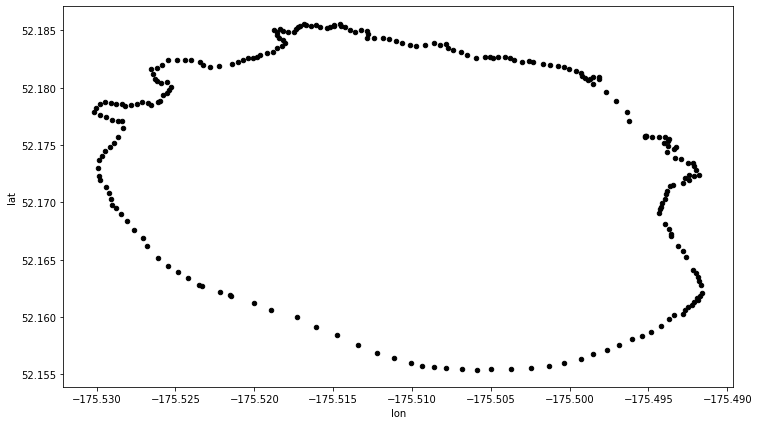

In [17]:
geo_loc = pd.DataFrame(data=island,columns=['lon', 'lat'])
geo_loc.plot.scatter(x='lon', y='lat', c='black')

In [24]:
def generate_heatmap(date,title):
    plt.rcParams['figure.figsize'] = (12,7)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines(resolution='110m')
    rect = list(zip([-0.041656494140625,0.041656494140625,0.041656494140625,-0.041656494140625],[-0.041656494140625,-0.041656494140625,0.041656494140625,0.041656494140625]))
    ax.set_extent([-175.2708,-175.7708,52.02083,52.35416])
    plt.scatter(y='lat',x ='lon',
                data=df[df['date']==date], 
                c='DIATO', 
                cmap='Greens',
                s=[54.6559**2]*len(df[df['date']==date]),
                marker=rect,
                transform=ccrs.PlateCarree()
               )
    geo_loc.plot.scatter(x='lon', y='lat', c='black', ax=ax)
    plt.colorbar()
    ax.set_title(title)
    ax.set_ylim(df['lat'].min(), df['lat'].max())
    ax.set_xlim(df['lon'].min(), df['lon'].max())
    return plt.show()

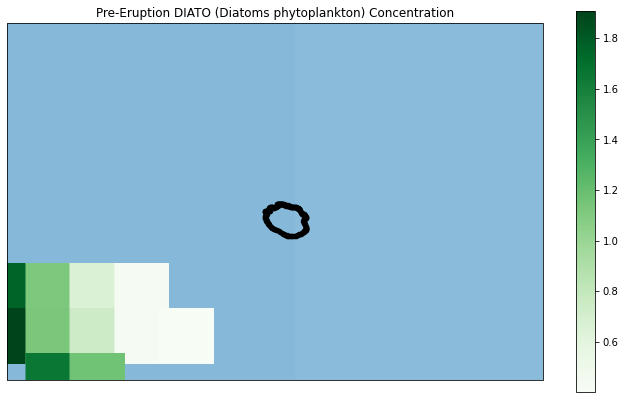

In [35]:
generate_heatmap('2008-06-03',"Pre-Eruption DIATO (Diatoms phytoplankton) Concentration")

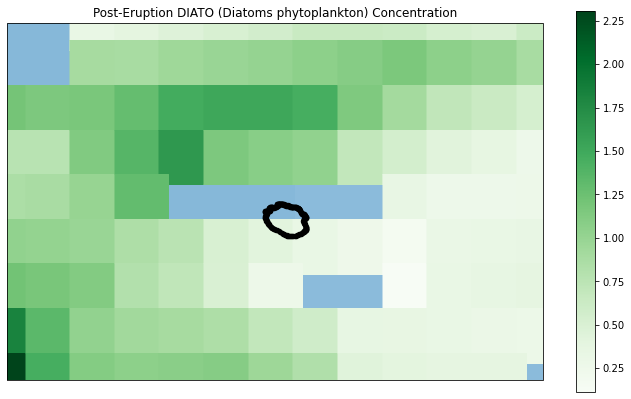

In [25]:
generate_heatmap('2008-08-18',"Post-Eruption DIATO (Diatoms phytoplankton) Concentration")

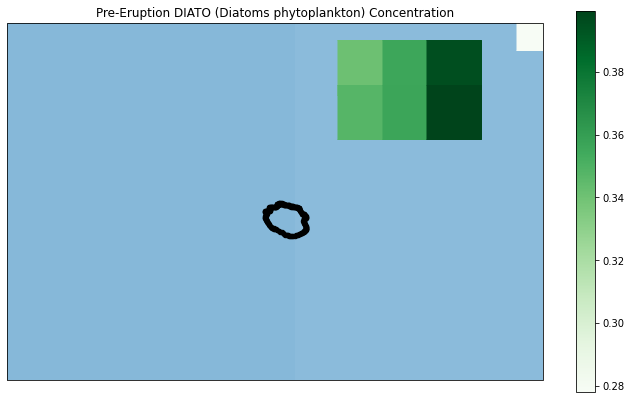

In [23]:
generate_heatmap('2008-08-20',"Post-Eruption DIATO (Diatoms phytoplankton) Concentration")

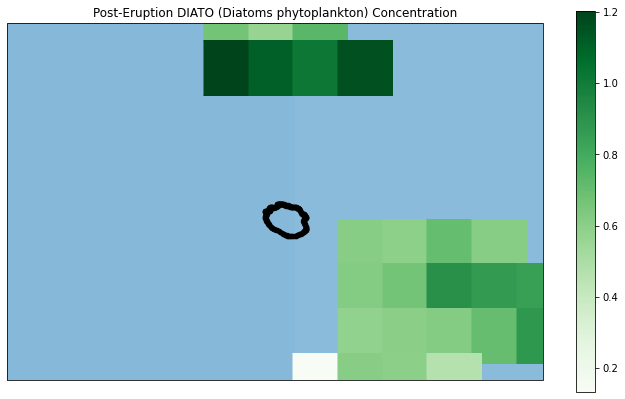

In [26]:
generate_heatmap('2008-08-27',"Post-Eruption DIATO (Diatoms phytoplankton) Concentration")

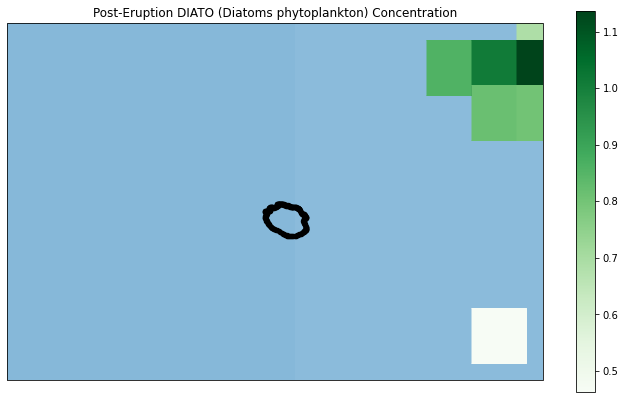

In [28]:
generate_heatmap('2008-09-01',"Post-Eruption DIATO (Diatoms phytoplankton) Concentration")

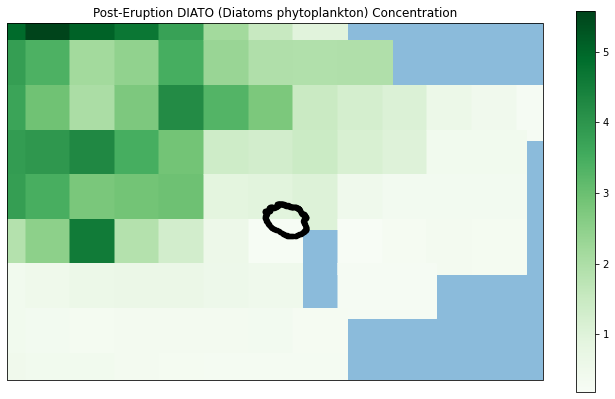

In [29]:
generate_heatmap('2008-09-04',"Post-Eruption DIATO (Diatoms phytoplankton) Concentration")

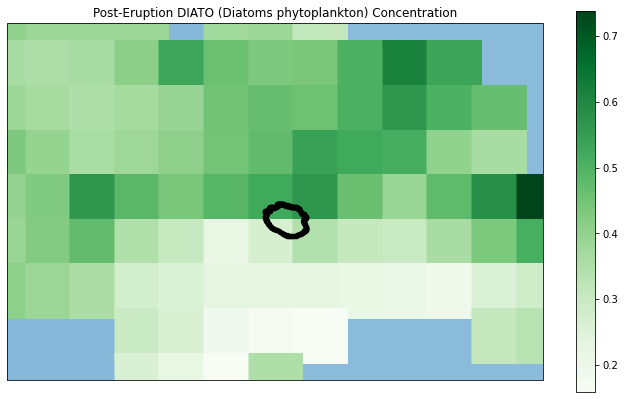

In [32]:
generate_heatmap('2008-09-29',"Post-Eruption DIATO (Diatoms phytoplankton) Concentration")